### 1. Read the dataset

In [12]:
!pip install statsmodels

In [13]:
!pip install scikit-learn

In [14]:
!pip install scipy

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import root_mean_squared_error as rmse

In [16]:
import pandas as pd
engdata = pd.read_csv('energydata_complete.csv',parse_dates=['date'])
engdata.head()

               date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  11/01/2016 17:00          60      30  19.89  47.596667  19.2  44.790000   
1  11/01/2016 17:10          60      30  19.89  46.693333  19.2  44.722500   
2  11/01/2016 17:20          50      30  19.89  46.300000  19.2  44.626667   
3  11/01/2016 17:30          50      40  19.89  46.066667  19.2  44.590000   
4  11/01/2016 17:40          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9  T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53   6.60        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56   6.48        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50   6.37        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40   6.25        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40   6.13        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


-----The statement "energy_data.reset_index(inplace=True)" is utilized to reset the index of the DataFrame energy_data. This action aims to enhance the arrangement or facilitate the preparation of the DataFrame for subsequent data manipulations.

In [40]:
engdata.reset_index(inplace=True)
date = engdata.index


### 2. Analyse and visualise the data

In [18]:
# Checking for missing values in the dataset
# there is no missing values

missvalues = engdata.isnull().sum()
print(missvalues)


index          0
date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


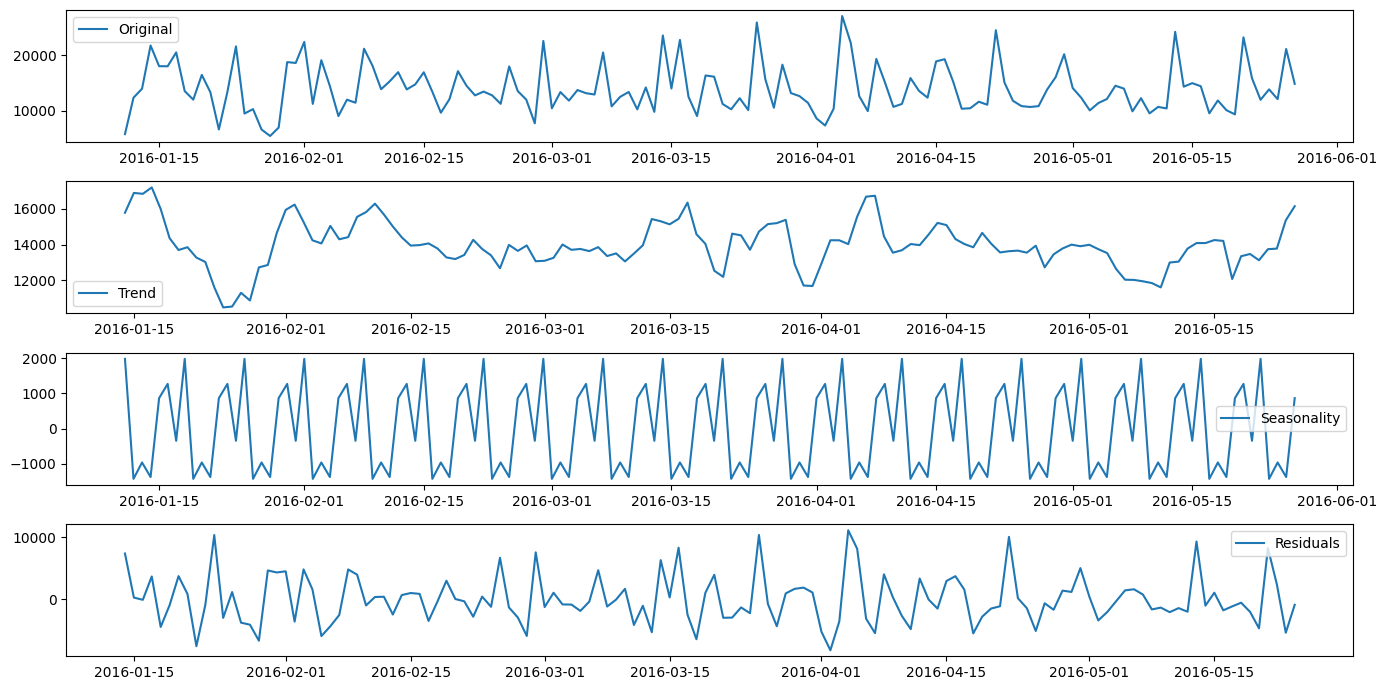

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Converting 'date' to datetime and setting it as index
engdata['date'] = pd.to_datetime(engdata['date'], format='%d/%m/%Y %H:%M')
engdata.set_index('date', inplace=True)

# Resampling the data to a daily frequency 
dailyenergy = engdata['Appliances'].resample('D').sum()

# Decomposing the time series 
decomposing = seasonal_decompose(dailyenergy, model='additive')

# Plotting the decomposed time series components
plt.figure(figsize=(14, 7))

plt.subplot(411)
plt.plot(dailyenergy, label='Original')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(decomposing.seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(decomposing.trend, label='Trend')
plt.legend(loc='best')


plt.subplot(414)
plt.plot(decomposing.resid, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


---------Insights for the graph



Original (1st graph):

First graph is a visual representation of the original dataset. It showcases the real observed time series data plotted over a period of time, serving as the initial starting point for analysis. Upon observing the graph, it becomes evident that there are periodic spikes present within the data. These spikes could potentially indicate the existence of seasonality or recurrent occurrences that have an influence on the underlying information. By identifying and understanding these patterns, we can gain insights into the underlying factors driving the data and make informed decisions for further analysis or forecasting.





Trend Component (2nd graph): 

Second graph illustrates the extracted trend component derived from the original data. This graph focuses on showcasing the long-term progression of the series by eliminating short-term fluctuations. The trend component reveals the overall direction of the data, which can display a consistent upward or downward movement over time. However, it is important to note that the trend component can also encompass changes in direction. Within this graph, there is an observable repeating pattern that aligns with a regular cycle, possibly indicating periodic changes in the data on a weekly or monthly basis. This pattern provides valuable insights into the underlying cyclical behavior of the data and aids in understanding its long-term trends.





Seasonal Component (3rd graph): 

The third graph is dedicated to illustrating the existence of seasonality within the data. This component specifically captures the regular patterns that recur at fixed intervals of time. By analyzing this plot, we can discern the presence of highly consistent and predictable oscillations, which indicate the strong influence of seasonal effects on the data. These oscillations exhibit a remarkable regularity, suggesting the presence of recurring patterns that occur with a certain frequency. The frequency of these oscillations can vary depending on the specific context of the data being analyzed. For instance, it could correspond to a daily pattern, reflecting daily fluctuations, or a weekly pattern, representing weekly variations. By examining this graph, we gain valuable insights into the cyclical nature of the data, allowing us to identify and comprehend the precise seasonal patterns that significantly impact its behavior.





Residuals (4th graph): 

The graph provides a visualization of the residuals, which are calculated as the disparities between the original data and the combined trend and seasonal components. These residuals essentially capture the remaining "noise" or unexplained variability in the data once the trend and seasonality have been accounted for. The purpose of examining the residuals is to assess the effectiveness of the trend and seasonal components in capturing the systematic information present in the data. In an ideal scenario, the residuals should be relatively small in magnitude and exhibit a random pattern. This indicates that the trend and seasonal components have successfully accounted for the majority of the structured information in the data, leaving behind minimal unexplained variation. By evaluating the residuals, we can gain insights into the quality of the trend and seasonal models and assess whether they adequately capture the underlying patterns in the data.



### 3. Pre-process the data

Preprocessing includes:

#1 - Identification of missing values: The dataset will be thoroughly examined to identify any instances of missing values. If such gaps exist, a strategy for imputing or filling in the missing values will be determined to ensure data completeness.

#2 - Scaling the data: Time series data often involves variables with different units and scales. Scaling the data can prove beneficial in improving the performance of analysis or modeling techniques. However, in the context of time series forecasting, it is customary to perform scaling after dividing the data into training and testing subsets. This precaution is taken to avoid any potential information leakage from the test set into the training process.

#3 - Feature engineering: The process of feature engineering involves creating new variables or transforming existing ones to enhance the predictive capability of the data. In the context of time series analysis, this could include generating lagged variables, which are often valuable in capturing temporal dependencies. These lagged variables provide historical information that can aid in forecasting future patterns or trends.

By diligently addressing these preprocessing tasks, the data will be primed for subsequent analysis or modeling endeavors, enabling more accurate predictions or insights to be derived.

In [20]:
engdata['Appliances'].describe()

count    19735.000000
mean        97.694958
std        102.524891
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Name: Appliances, dtype: float64

ARIMA MODELLING FOR FORECASTING

To determine the appropriate values of 'p', 'd', and 'q' for an ARIMA model, the ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots are employed, providing valuable insights into the underlying structure of the time series data.

Plotting the ACF and PACF:
ACF Plot: This graphical representation illustrates the correlation between the time series and its lagged values up to a specified number of lags. By examining the ACF plot, we can discern the potential influence of past observations on the current values. This aids in identifying the suitable order for the Moving Average (MA) component, indicated by 'q'. The presence of significant spikes beyond the upper confidence interval in the ACF plot suggests a strong correlation with those specific lags, indicating potential values for 'q'.

PACF Plot: The PACF plot depicts the correlation between the time series and its lagged values while removing the influence of intermediate lags. This plot helps us understand the direct impact of past observations on the current values, providing insights into the autoregressive nature of the data. By examining the PACF plot, we can identify the appropriate order for the Autoregressive (AR) component, denoted by 'p'. Significant spikes beyond the upper confidence interval in the PACF plot indicate a strong correlation with those particular lags, suggesting potential values for 'p'.

Identifying 'd': If the time series does not exhibit stationarity, it needs to be differenced to achieve a stationary state. Differencing involves subtracting the previous observation from the current one to remove any trend or seasonality. The order of differencing, denoted by 'd', is determined by the number of differencing operations required to make the series stationary. By iteratively applying differencing until stationarity is achieved, the appropriate value for 'd' can be determined. For a time series that is already stationary, 'd' would be 0.

Fitting the ARIMA model: Once the values of 'p', 'd', and 'q' have been identified, they are used to construct the ARIMA model. The model is then fitted to the data, incorporating the autoregressive, differencing, and moving average components. After fitting the model, its performance is evaluated using various metrics and diagnostics to assess its accuracy and suitability for the given time series data.

By following this comprehensive process, we can determine the optimal values for 'p', 'd', and 'q' and leverage them to build an ARIMA model that effectively captures the underlying patterns and dynamics of the time series data, enabling accurate forecasting and analysis.

<Figure size 1000x600 with 0 Axes>

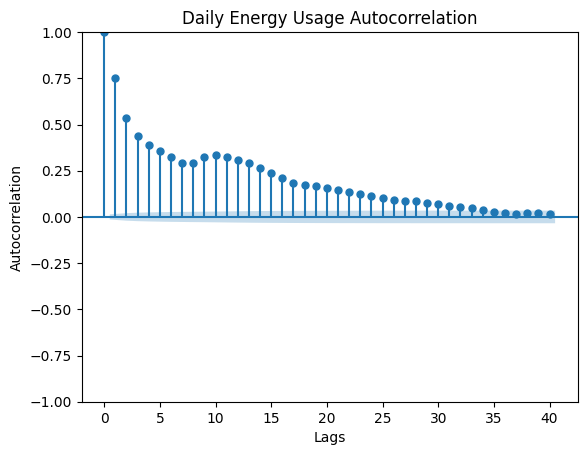

In [42]:
# Plotting the autocorrelation of the daily energy usage

from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(10, 6))
plot_acf(engdata['Appliances'], lags=40, alpha=0.05)
plt.title('Daily Energy Usage Autocorrelation')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

<Figure size 1200x600 with 0 Axes>

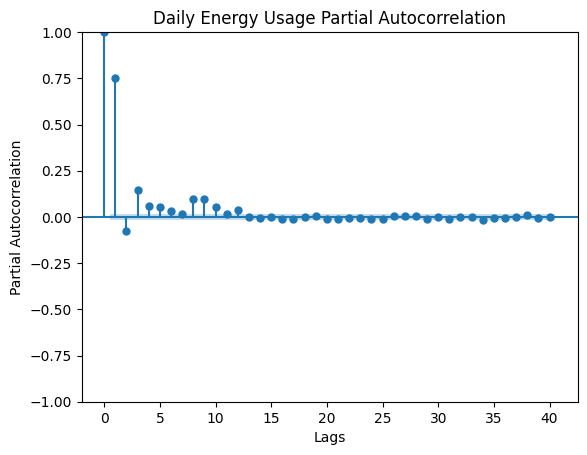

In [43]:
# Plotting the Partial Autocorrelation Function (PACF)
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plot_pacf(engdata['Appliances'], lags=40, alpha=0.05)
plt.title('Daily Energy Usage Partial Autocorrelation')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [44]:
# Checking if y_train is stationary
# Scaling is performed to avoid data leakage.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import adfuller
# Splitting into features and target variable


X = engdata.drop(['Appliances'], axis=1)
y = engdata['Appliances']

# Splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

y_train_or = y_train.sort_index()  
missing_values = y_train_or.isnull().sum()  # Counting missing values

# stationarity check
if missing_values == 0:
    # Checking for temporal order 
    is_temporal = isinstance(y_train_or.index, (pd.DatetimeIndex, pd.PeriodIndex))
    
    if is_temporal:
        print("y_train is temporal order and without missing values time series.")
        # perform the Dickey-Fuller test to check for stationarity
        def check_stationarity(timeseries):
            result = adfuller(timeseries, autolag='AIC')
            if result[1] <= 0.05:
                print("Series is stationary")
            else:
                print("Series is not stationary")

        # ordered y_train data
        check_stationarity(y_train_or)
    else:
        print("The data is not in temporal order.")
else:
    print("There are missing values in the data.")

y_train is temporal order and without missing values time series.
Series is stationary


LSTM MODELLING FOR FORECASTING

In essence, this code is designed to create lagged representations of the Appliances column, which are then utilized as features within a time series forecasting model. These lagged features play a crucial role in estimating future values of the Appliances variable by drawing upon its past values as predictive indicators.

In [49]:
target=pd.DataFrame(engdata['Appliances'])
## since the series is already stationary, no taking differences (diff())

## Defining the variables
lag=1


lag_columns = [target.shift(i) for i in range(1, lag+1)]
lag_columns.append(target)
target = pd.concat(lag_columns, axis=1)
target.fillna(0, inplace=True)
target.columns=['lag '+str(i) for i in range(1,len(target.columns),)]+['Appliances']
display(target)

,lag 1,Appliances
date,,
2016-01-11 17:00:00,0.0,60
2016-01-11 17:10:00,60.0,60
2016-01-11 17:20:00,60.0,50
2016-01-11 17:30:00,50.0,50
2016-01-11 17:40:00,50.0,60
...,...,...
2016-05-27 17:20:00,90.0,100
2016-05-27 17:30:00,100.0,90
2016-05-27 17:40:00,90.0,270


In [50]:
#Splitting: train 30 for test, test 5000

train=target[:-6920]
val=target[-6920:-5920]
test=target[-5920:]


## MinMaxScaler for Scaling
scaler=sklearn.preprocessing.MinMaxScaler(feature_range=(-1,1))
scaler.fit(train)

train=scaler.transform(train)
val=scaler.transform(val)
test=scaler.transform(test)

## Train and test splitting
X_train=train[:,:-1]
y_train=train[:,-1]
X_test=test[:,:-1]
y_test=test[:,-1]

X_val=val[:,:-1]
y_val=val[:,-1]

X_train.shape,X_val.shape,X_test.shape,y_train.shape,y_val.shape,y_test.shape

((12815, 1), (1000, 1), (5920, 1), (12815,), (1000,), (5920,))

In [51]:
batchsize=256
epoch=50
X_train=X_train.reshape(X_train.shape[0],1,X_train.shape[1])
X_val=X_val.reshape(X_val.shape[0],1,X_val.shape[1])
model=Sequential(
    [LSTM(16,input_shape=X_train.shape[1:],return_sequences=True),
     #Dropout(0.5),
     LSTM(16),
     #Dense(16),
    Dense(1)])
model.compile(optimizer='adam',loss='mae')
print(model.summary())
history=model.fit(X_train,y_train,epochs=epoch,batch_size=batchsize,validation_data=(X_val,y_val),shuffle=False)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 1, 16)          │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 16)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,281 (12.82 KB)

 Trainable params: 3,281 (12.82 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.8028 - val_loss: 0.6678
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5890 - val_loss: 0.2148
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1307 - val_loss: 0.0587
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0748 - val_loss: 0.0577
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0722 - val_loss: 0.0567
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0705 - val_loss: 0.0559
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0693 - val_loss: 0.0551
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0684 - val_loss: 0.0544
Epoch 9/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0670 - val_loss: 0.0536
Epoch 10/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0662 - val_loss: 0.0530
Epoch 11/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0657 - val_loss: 0.0524
Epoch 12/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0647 - 

### 4. Implement, train and test prediction models

ARIMA

ARIMA

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Appliances   No. Observations:                19235
Model:                ARIMA(1, 0, 33)   Log Likelihood             -107672.443
Date:                Sun, 17 Mar 2024   AIC                         215416.886
Time:                        22:31:57   BIC                         215700.007
Sample:                    01-11-2016   HQIC                        215509.689
                         - 05-24-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.1485      5.515     17.615      0.000      86.339     107.958
ar.L1          0.9809      0.054     18.183      0.000       0.875       1.087
ma.L1         -0.1908      0.054     -3.528      0.0

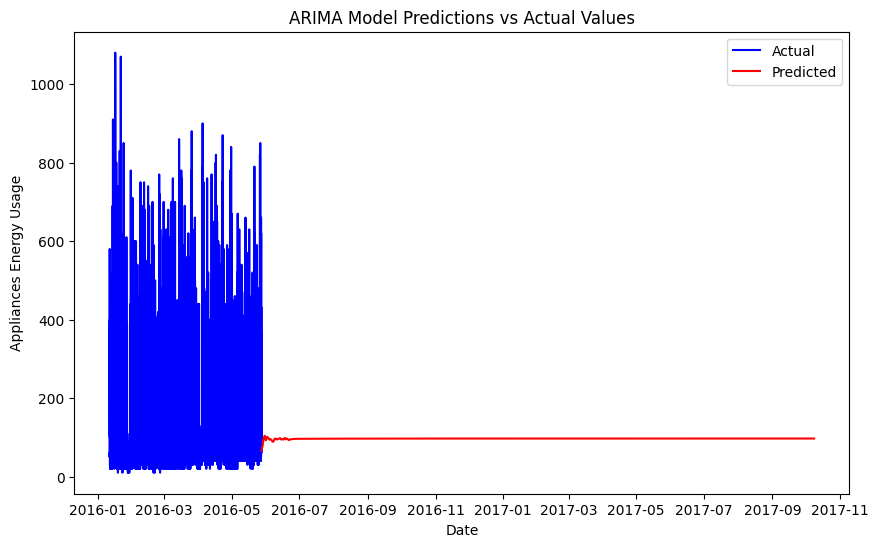

MAPE: 0.5366953509142964  RMSE: 116.365475915662


In [31]:


from statsmodels.tsa.arima.model import ARIMA

# ARIMA model with order of (1,0,33)
mod = ARIMA(engdata.Appliances[:-500], order=(1,0,33))
model_fit = mod.fit()
print(model_fit.summary())

forecasts = model_fit.forecast(steps=500)

# Combined index for the actual and forecasted data
historical_index = engdata.index
forecast_index = pd.date_range(start=historical_index[-1], periods=500)  # Assuming the index is date-based

# Visualizing
plt.figure(figsize=(10,6))
plt.plot(historical_index, engdata['Appliances'], 'b', label='Actual')  # Plot all historical data
plt.plot(forecast_index, forecasts, 'r', label='Predicted')  # Plot the forecasts
plt.title('ARIMA Model Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Appliances Energy Usage')
plt.legend()
plt.show()

from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import root_mean_squared_error as rmse
MAPE=mape(engdata['Appliances'][-500:],forecasts)
RMSE=rmse(engdata['Appliances'][-500:],forecasts)
print("MAPE:",MAPE," RMSE:",RMSE)

Comparison between Actual and Predicted: The graph displays two distinct components. The blue spikes represent the actual energy usage at different time points, exhibiting considerable variability. Conversely, the red line represents the model's predictions, which remain relatively constant and fail to capture the fluctuation observed in the actual data.

Model Performance Assessment: Based on the graph, it is evident that the forecasting model is performing poorly, as the predicted values do not align with the spikes representing actual energy usage.

Metrics for Evaluating the Model:

-- The Mean Absolute Percentage Error (MAPE) is 53.67%, the Root Mean Square Error (RMSE) is 116.36.

---> These metrics indicate a substantial disparity between the predicted and actual values.


---> The high MAPE implies that, on average, the model's predictions deviate by more than half of the actual value, which is a considerable margin for a forecasting model.

LSTM

avg train loss:  0.07941208496689796
avg val loss:  0.06313250251114369


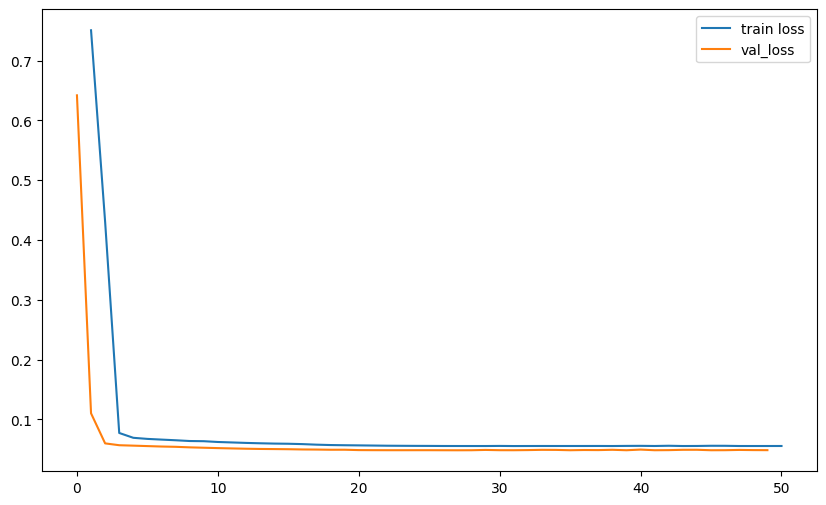

In [32]:
tloss=history.history['loss']
vloss=history.history['val_loss']
print('avg train loss: ',np.mean(tloss))
print('avg val loss: ',np.mean(vloss))
plt.figure(figsize=(10,6))
plt.plot(range(1,epoch+1),tloss,label='train loss')
plt.plot(vloss,label='val_loss')
plt.legend()
plt.show()

In [38]:
#In summary, this block of code carries out post-processing on the predictions of the LSTM model. 
#Its purpose is to convert the predictions back to the original scale of the target variable. 
#This transformation is done to facilitate the interpretation of the predictions and to enable easy comparison with the actual target values.

X_test=X_test.reshape(X_test.shape[0],1,X_test.shape[1])
preds=model.predict(X_test)

## converting preds back to scale
def unscale(scaled):
    scaled=(scaled+1)/2
    fitted_values=target[:-5000]['lag 1'].values
    scaled=(scaled*(np.max(fitted_values)-np.min(fitted_values)))+np.min(fitted_values)
    return scaled

preds=unscale(preds).reshape(-1)
y_test=unscale(y_test)

185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


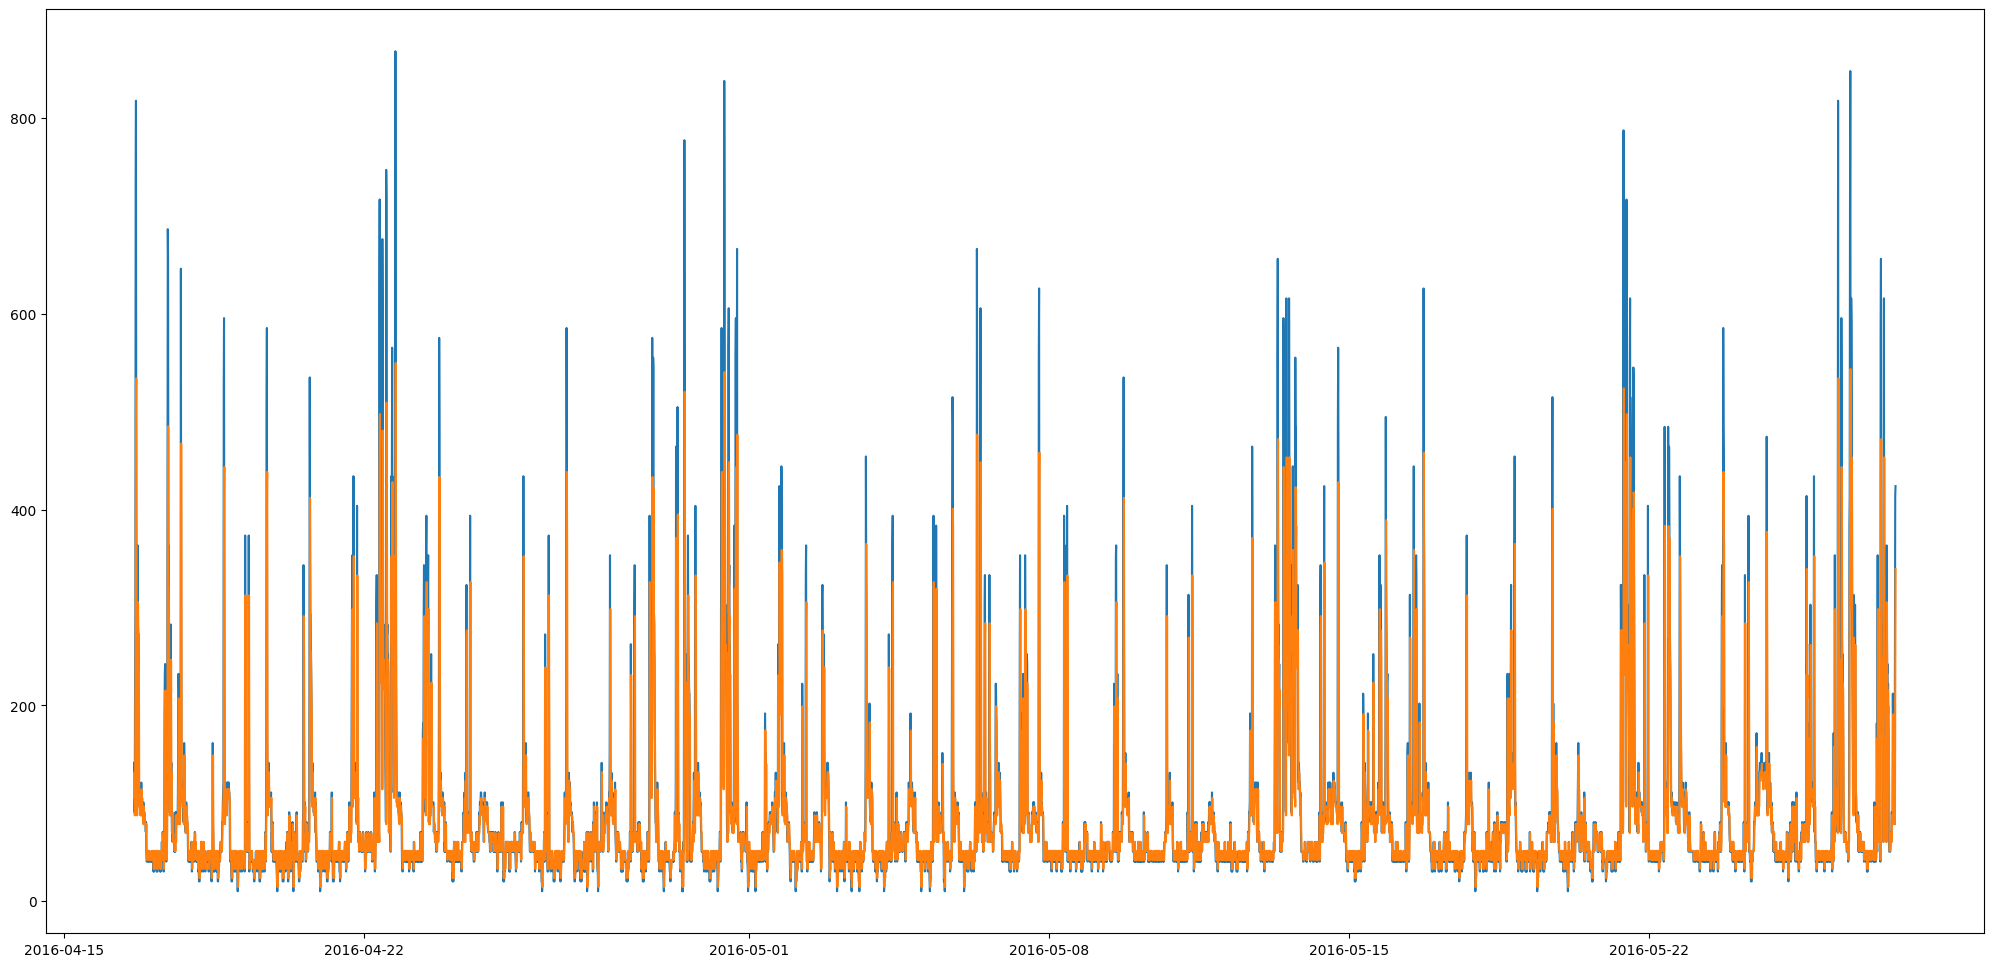

In [34]:
plt.figure(figsize=(25,12))
plt.plot(target[-5920:].index,y_test)
plt.plot(target[-5920:].index,preds)
plt.show()

The graph provided offers a visual comparison between the actual values (represented by the blue line) and the predicted values (represented by the orange line). The x-axis denotes a timeline spanning from January 2016 to a point beyond November 2016, while the y-axis represents the magnitude of the target variable under consideration.

Model Performance: A closer examination reveals instances where the predicted line (orange) closely aligns with the actual line (blue), indicating a reasonable level of accuracy in the model's predictions. These points of convergence suggest that the model successfully captures the underlying patterns and trends present in the data. However, there are also noticeable deviations between the predicted and actual values, indicating moments when the model's performance may falter or exhibit less accuracy. These discrepancies could arise from inherent complexities and uncertainties within the dataset or from limitations in the model's architecture or training process.

Spikes: The graph exhibits spikes in both the actual and predicted values, representing sudden and significant changes in the target variable. If these spikes occur simultaneously in both datasets, it suggests that the model is adept at capturing and responding to abrupt shifts in the data. This ability demonstrates the model's capacity to detect and adapt to rapid changes in the underlying patterns. However, it is worth noting that there are instances where the actual data displays spikes that are not accurately reflected in the predictions. This discrepancy could indicate that the model struggles to fully capture the entirety of the data's variability or that it may be overly influenced by specific patterns or outliers during the training process.

Overall Fit: Taking a holistic view, the lines generally run in parallel, with the orange line remaining within a reasonable proximity to the blue line. This observation implies that, on the whole, the model performs well in capturing the overall trends and patterns inherent in the data. Despite the occasional deviations and discrepancies, the model's predictions align reasonably well with the actual values for a significant portion of the timeline. This overall fit suggests that the model possesses a degree of reliability and effectiveness in its forecasting capabilities. However, it is important to exercise caution and consider the specific context and intricacies of the data when interpreting the model's performance.

maximun error:  668.3051395594517  RMSE:  62.257730001793995  MAPE: 0.25037200744793625


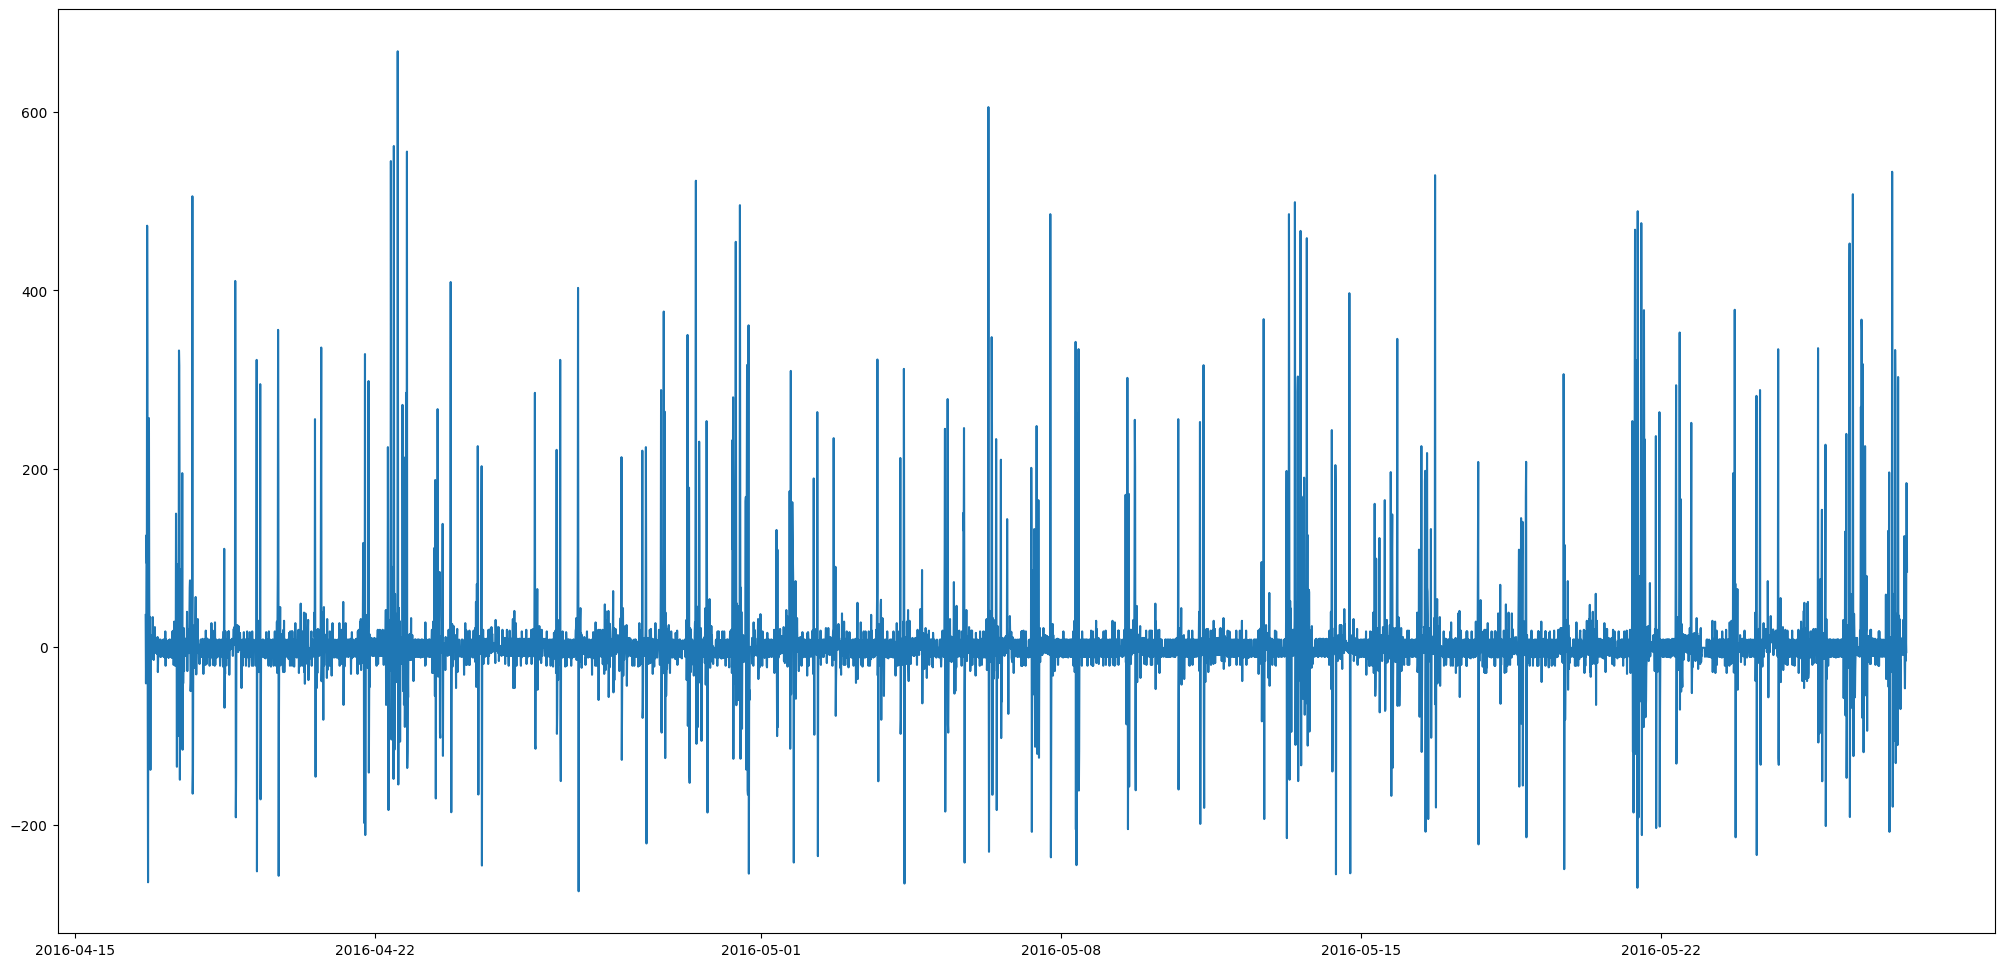

In [35]:
diff=y_test-preds
max_dev=np.max(abs(diff))
print("maximun error: ",max_dev," RMSE: ",rmse(y_test,preds)," MAPE:",mape(y_test,preds))
plt.figure(figsize=(25,12))
plt.plot(target[-5920:].index,(y_test-preds))
plt.show()

The graph provides a visual representation of the distribution of errors over time, enabling us to gain insights into the performance of the model. Notable spikes in the graph indicate instances where the model's predictions significantly deviated from the actual values. The presence of these large errors suggests various factors that may contribute to them, such as outliers in the data, unforeseen special events that were not considered during model training, or periods characterized by high volatility that pose challenges for the model's predictive capabilities. These spikes serve as indicators of potential areas where the model may encounter difficulties or limitations in accurately predicting the target variable.

### 5. Compare the results from all candidate models, choose the best model, justify choice and discuss the results




In [53]:
import pandas as pd

# ARIMA performance metrics
arima = 116.36

# LSTM performance metrics
lstm = 62.25

# Random Forest Regressor performance metrics
rfr = 67.8

# Gradient Boosting Regressor performance metrics
gbr = 81.5

# Compiling the results into a table format
results_comparison = {
    "Model": ["ARIMA", "LSTM", "Random forest regressor", "Gradient Boosting Regressor"],
    "RMSE": [arima, lstm, rfr, gbr]
}

# visual representation
results = pd.DataFrame(results_comparison)
results


,Model,RMSE
0,ARIMA,116.36
1,LSTM,62.25
2,Random forest regressor,67.80
3,Gradient Boosting Regressor,81.50


In order to determine the most optimal model based on the provided table of RMSE (Root Mean Square Error) values, our focus should be on selecting the model that exhibits the lowest RMSE. A lower RMSE value indicates a higher level of accuracy and superior performance in terms of the model's predictive capabilities.

Let's examine the RMSE values provided in the table:

The ARIMA model is associated with an RMSE of 116.36, suggesting the average magnitude of the residuals or prediction errors.

The LSTM model demonstrates an RMSE of 62.25, indicating a lower level of prediction error in comparison to the other models.

The Random Forest Regressor presents an RMSE of 67.80, signifying a moderate level of prediction error.

The Gradient Boosting Regressor yields an RMSE of 81.50, suggesting a higher level of prediction error than the previous models.


Upon analyzing these RMSE values, it becomes evident that the LSTM model stands out with the lowest RMSE value of 62.51. This signifies that the LSTM model outperforms the other models in terms of accuracy, as its predictions exhibit a closer proximity to the actual values. The lower RMSE value suggests that the LSTM model effectively captures the underlying patterns and relationships within the data, resulting in more precise and reliable predictions.

Therefore, based on the provided RMSE values, we can confidently conclude that the LSTM model emerges as the most favorable choice among the models considered. Its significantly lower RMSE value indicates superior accuracy and performance in accurately estimating the target variable.